# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [35]:
import pandas as pd

funcionarios_df = pd.read_csv("CadastroFuncionarios.csv", sep=";", decimal=",")
clientes_df = pd.read_csv("CadastroClientes.csv", sep=";")
operacoes_df = pd.read_excel("BaseServiçosPrestados.xlsx")

#display(funcionarios_df)
#display(clientes_df)
#display(operacoes_df)

In [36]:
ordens_servisos_df = operacoes_df.merge(clientes_df, on="ID Cliente")
ordens_servisos_df = ordens_servisos_df.merge(funcionarios_df, on="ID Funcionário")

ordens_servisos_df = ordens_servisos_df.drop(["Estado Civil", "Salario Base", "Impostos", "Beneficios", "VT", "VR"], axis=1)
ordens_servisos_df = ordens_servisos_df.rename(columns={"Cliente": "Nome Cliente", "Nome Completo": "Nome Funcionario"})

display(ordens_servisos_df)

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Nome Cliente,Valor Contrato Mensal,Nome Funcionario,Cargo,Area
0,OS0001,67,1,14,Teixeira Gonçalves,540,Carla Amiccuci Areias,Coordenador,Financeiro
1,OS0058,67,78,6,Eduardo Resende,1710,Carla Amiccuci Areias,Coordenador,Financeiro
2,OS0092,67,125,8,De Machado,1710,Carla Amiccuci Areias,Coordenador,Financeiro
3,OS0128,67,175,6,Vilhena Rossini,945,Carla Amiccuci Areias,Coordenador,Financeiro
4,OS0002,17,2,12,Souza Santos,1260,Pedro Carrera,Coordenador,Logística
...,...,...,...,...,...,...,...,...,...
232,OS0224,25,304,14,Da Oliveira,810,Livia Mello,Diretor,Administrativo
233,OS0228,79,308,10,Manoel Rimes,1935,Larissa Coutinho Beltrao,Diretor,Operações
234,OS0229,99,309,8,Arlindo Amorim,3735,Rafael Viana Santos,Coordenador,Administrativo
235,OS0230,14,310,12,Kenji Espinha,3735,Jessica Oliveira Lima,Estagiário,Financeiro


In [37]:
# Questão 01:

funcionarios_df["Salario Total"] = funcionarios_df["Salario Base"] + funcionarios_df["Impostos"] + funcionarios_df["Beneficios"] + funcionarios_df["VT"] + funcionarios_df["VR"]
total_salarios = funcionarios_df["Salario Total"].sum()

display(funcionarios_df)
print(f"A despesa total da empresa com funcionários foi de R$ {total_salarios:_}")

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Salario Total
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações,38208.04
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística,9915.36
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo,28195.32
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo,36962.66
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo,9568.36
...,...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística,19104.18
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial,7875.92
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo,42616.32
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial,9605.88


A despesa total da empresa com funcionários no período analisado foi de R$ 2_717_493.22


In [39]:
# Questão 02:

faturamento_df = ordens_servisos_df
faturamento_df["Faturamento por Contrato"] = faturamento_df["Valor Contrato Mensal"] * faturamento_df["Tempo Total de Contrato (Meses)"]
faturamento_total = faturamento_df["Faturamento"].sum()

display(faturamento_df)
print(f"O faturamento total da empresa foi de R$ {faturamento_total:_}")

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Nome Cliente,Valor Contrato Mensal,Nome Funcionario,Cargo,Area,Faturamento,Faturamento por Contrato
0,OS0001,67,1,14,Teixeira Gonçalves,540,Carla Amiccuci Areias,Coordenador,Financeiro,7560,7560
1,OS0058,67,78,6,Eduardo Resende,1710,Carla Amiccuci Areias,Coordenador,Financeiro,10260,10260
2,OS0092,67,125,8,De Machado,1710,Carla Amiccuci Areias,Coordenador,Financeiro,13680,13680
3,OS0128,67,175,6,Vilhena Rossini,945,Carla Amiccuci Areias,Coordenador,Financeiro,5670,5670
4,OS0002,17,2,12,Souza Santos,1260,Pedro Carrera,Coordenador,Logística,15120,15120
...,...,...,...,...,...,...,...,...,...,...,...
232,OS0224,25,304,14,Da Oliveira,810,Livia Mello,Diretor,Administrativo,11340,11340
233,OS0228,79,308,10,Manoel Rimes,1935,Larissa Coutinho Beltrao,Diretor,Operações,19350,19350
234,OS0229,99,309,8,Arlindo Amorim,3735,Rafael Viana Santos,Coordenador,Administrativo,29880,29880
235,OS0230,14,310,12,Kenji Espinha,3735,Jessica Oliveira Lima,Estagiário,Financeiro,44820,44820


O faturamento total da empresa foi de R$ 5_519_160


In [27]:
# Questão 03:

total_funcis = funcionarios_df["Nome Completo"].count()
funcis_contrato_fechado = faturamento_df["ID Funcionário"].unique()
total_funcis_contrato_fechado = len(funcis_contrato_fechado)

print(f"No total {total_funcis_contrato_fechado} já fecharam algum contrato, o que representa {(total_funcis_contrato_fechado / total_funcis):.2%} dos funcionários da empresa")

No total 99 já fecharam algum contrato, o que representa 86.84% dos funcionários da empresa


Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64


<Axes: xlabel='Area'>

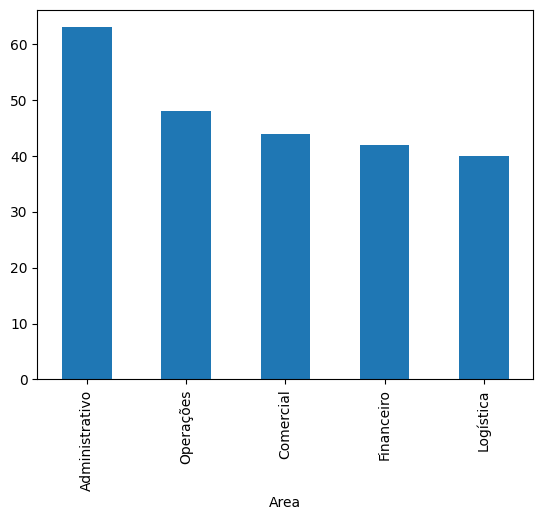

In [32]:
# Questão 04:

contratos_area = ordens_servisos_df["Area"].value_counts()

print(contratos_area)

contratos_area.plot(kind="bar")

Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64


<Axes: xlabel='Area'>

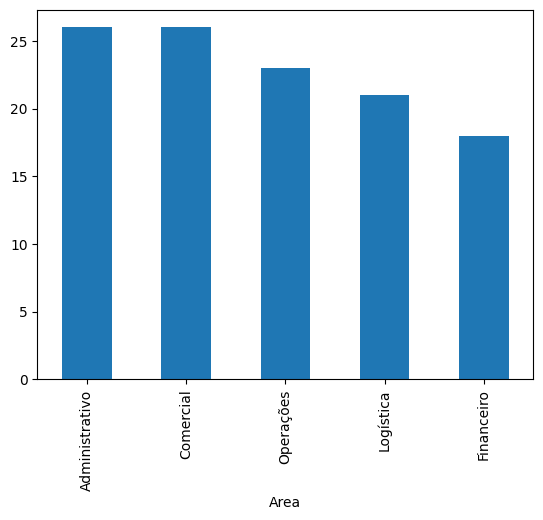

In [34]:
# Questão 05:

funcis_area = funcionarios_df["Area"].value_counts()

print(funcis_area)

funcis_area.plot(kind="bar")

In [21]:
# Questão 06:

faturamento_medio_mensal = ordens_servisos_df["Valor Contrato Mensal"].mean()

print(f"O faturamento médio mensal da empresa é de R$ {faturamento_medio_mensal:_.2f}")

O faturamento médio mensal da empresa é de R$ 2_438.35


Nome Funcionario
Rodrigo e Silva Lemos               6
Fernanda Castro Morett Ceppas       5
Marcos Almeida Albuquerque Faria    5
Guilherme Nunez                     5
Carla Amiccuci Areias               4
                                   ..
Adelino Gomes                       1
Mariana Martins                     1
Adriano de Souza                    1
Andre Campos                        1
Lucas Duarte                        1
Name: count, Length: 99, dtype: int64


<Axes: xlabel='Nome Funcionario'>

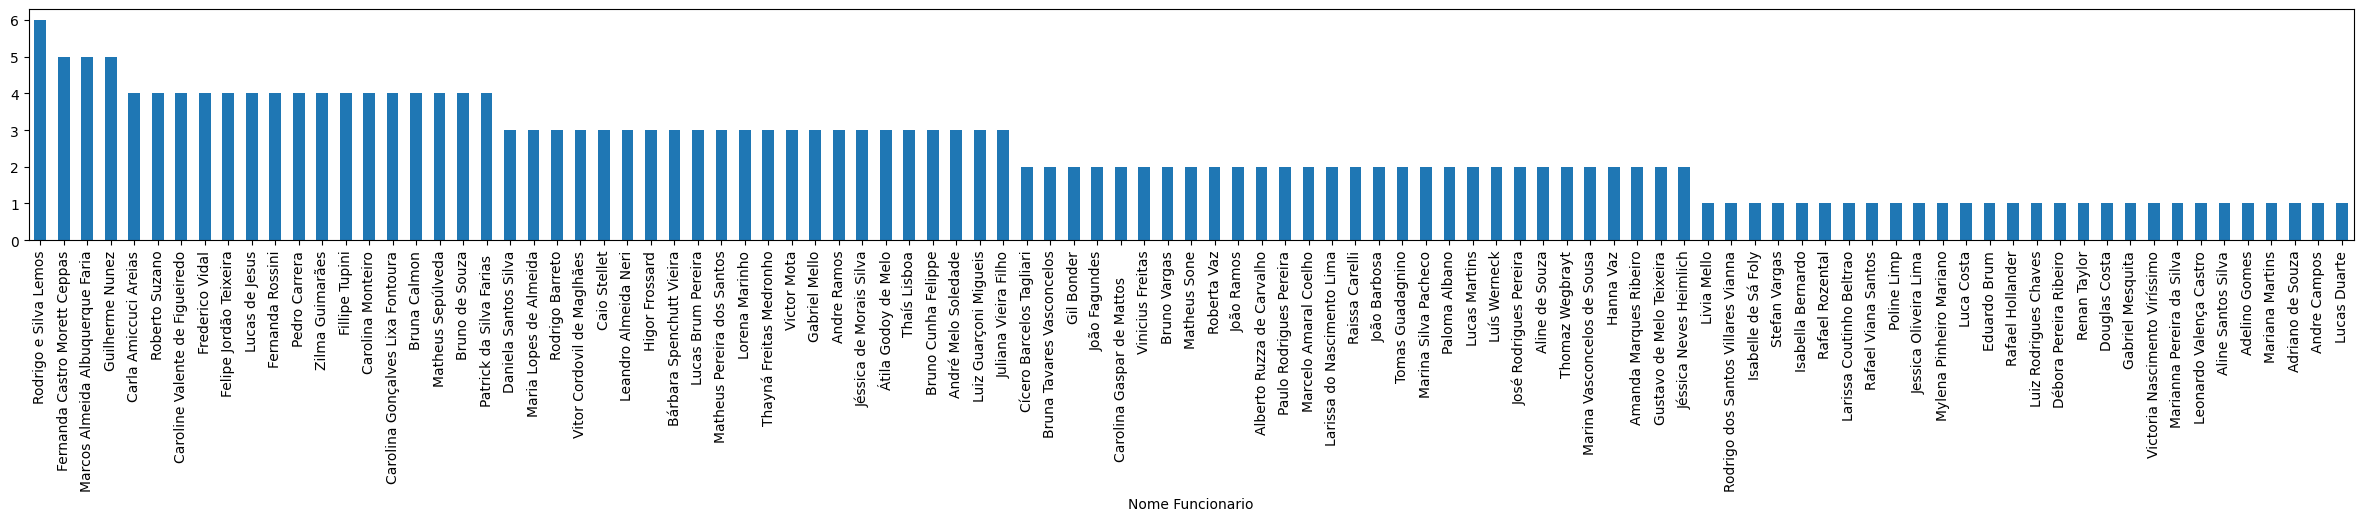

In [45]:
# Questão Extra: Fechamento de contratos por funcionário

contratos_funci = ordens_servisos_df["Nome Funcionario"].value_counts()

print(contratos_funci)

contratos_funci.plot(figsize=(30, 3), kind="bar")

In [48]:
# Questão Extra 2:

salario_medio = funcionarios_df["Salario Base"].mean()
maior_salario = funcionarios_df["Salario Base"].max()
menor_salario = funcionarios_df["Salario Base"].min()

print(f"O menor salário pago pela empresa é de R$ {menor_salario:_.2f}, e o maior salário é de R$ {maior_salario:_.2f}. A média salarial é de R$ {salario_medio:_.2f}")

O menor salário pago pela empresa é de R$ 1_865.00, e o maior salário é de R$ 24_857.00. A média salarial é de R$ 13_489.90
